In [20]:
import json
import random
import chess
import chess.svg

ranks = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
files = ['1', '2', '3', '4', '5', '6', '7', '8']
colors = [['Black', 'black', 'b', 'B'], ['White', 'white', 'w', 'W']]

# Blind Chess Practice

This was created on the 10th March 2020 for Vikrom Narula to practice blind chess.

## Remember Board Position Colors

In [21]:
def isEven(num):
    return num % 2 == 0


def showAllPositionAsMap():
    dictString = ""
    dictString += '{\n'
    for idy, file in enumerate(files):
        for idx, rank in enumerate(ranks):
            if (isEven(idx)):
                if (isEven(idy)):
                    dictString += f' "{rank}{file}":"{colors[0]}",'
                else:
                    dictString += f' "{rank}{file}":"{colors[1]}",'
            else:
                if (isEven(idy)):
                    dictString += f' "{rank}{file}":"{colors[1]}",'
                else:
                    dictString += f' "{rank}{file}":"{colors[0]}",'
    dictString = dictString[:-1]  # Remove last comma
    dictString += '\n}'
    return dictString

In [22]:
mapping = json.loads(showAllPositionAsMap())

In [23]:
def guessColor():
    exits = ['exit', 'dc', 'Exit']
    print('\n===========Guess the Color==============')
    position = random.choice(list(mapping.keys()))
    guess = input(f'What color is the position {position}? \n \n => ')
    if guess in exits:
        print('\nExisting...')
        print('========================================')
        return
    if len(guess) == 5 or len(guess) == 1:
        if guess in mapping[position]:
            print("\nCorrect Guess!!! Let's see if you get another one!")
            guessColor()
        else:
            print("\nWrong Guess!!! Let's try again.")
            guessColor()
    else:
        print('Bad Data!!!')
        guessColor()

In [5]:
guessColor()


===========Guess the Color==============
What color is the position h1? 
 
 => 
Bad Data!!!

===========Guess the Color==============
What color is the position g3? 
 
 => dc

Existing...


## Remember Board Position

In [99]:
def guessPosition():
    exits = ['exit', 'dc', 'Exit']
    randRank = random.choice(ranks)
    randFile = random.choice(files)
    print('\n===========Guess the Position==============')
    print(f'What position is X on the board?\n')
    squares = chess.SquareSet()
    squares.add(chess.parse_square(randRank + randFile))
    display(chess.svg.board(coordinates=False, size=150, squares=squares))
    guess = input('\n => ')
    if guess in exits:
        print('\nExisting...')
        print('============================================')
        return
    
    answer = chess.square_name(squares.pop())
    
    if len(guess) == 2 and guess[0] in ranks and guess[1] in files:
        if guess == answer:
            print("\nCorrect Guess!!! Let's see if you get another one!")
            guessPosition()
        else:
            print(f"\nWrong Guess!!! Answer was {answer}. Let's try again.")
            guessPosition()
    else:
        print('Bad Data!!!')
        guessPosition()


===========Guess the Position==============
What position is X on the board?



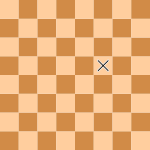


 => e5

Wrong Guess!!! Answer was f5. Let's try again.

===========Guess the Position==============
What position is X on the board?



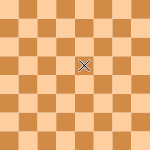


 => e5

Correct Guess!!! Let's see if you get another one!

===========Guess the Position==============
What position is X on the board?



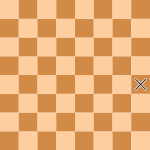


 => g4

Wrong Guess!!! Answer was h4. Let's try again.

===========Guess the Position==============
What position is X on the board?



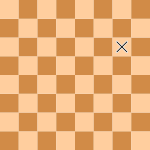


 => dc

Existing...


In [100]:
guessPosition()

## Remember Moves of Regular Pieces

In [25]:
def kingMoves(pos):
    moves = []
    rank = pos[0]
    file = pos[1]
    rankIdx = ranks.index(rank)
    fileIdx = files.index(file)
    if file == '1' and rank == 'a':
        possibleRanks = [ranks[rankIdx], ranks[rankIdx + 1]]
        possibleFiles = [files[fileIdx + 1], files[fileIdx]]
    elif file == '1' and rank == 'h':
        possibleRanks = [ranks[rankIdx - 1], ranks[rankIdx]]
        possibleFiles = [files[fileIdx + 1], files[fileIdx]]
    elif file == '8' and rank == 'a':
        possibleRanks = [ranks[rankIdx], ranks[rankIdx + 1]]
        possibleFiles = [files[fileIdx], files[fileIdx - 1]]
    elif file == '8' and rank == 'h':
        possibleRanks = [ranks[rankIdx - 1], ranks[rankIdx]]
        possibleFiles = [files[fileIdx], files[fileIdx - 1]]
    elif file == '1' and rank == 'a':
        possibleRanks = [ranks[rankIdx], ranks[rankIdx + 1]]
        possibleFiles = [files[fileIdx + 1], files[fileIdx]]
    elif file == '1':
        possibleRanks = [ranks[rankIdx - 1],
                         ranks[rankIdx], ranks[rankIdx + 1]]
        possibleFiles = [files[fileIdx + 1], files[fileIdx]]
    elif file == '8':
        possibleRanks = [ranks[rankIdx - 1],
                         ranks[rankIdx], ranks[rankIdx + 1]]
        possibleFiles = [files[fileIdx], files[fileIdx - 1]]
    elif rank == 'a':
        possibleRanks = [ranks[rankIdx], ranks[rankIdx + 1]]
        possibleFiles = [files[fileIdx + 1],
                         files[fileIdx], files[fileIdx - 1]]
    elif rank == 'h':
        possibleRanks = [ranks[rankIdx + 1], ranks[rankIdx]]
        possibleFiles = [files[fileIdx + 1],
                         files[fileIdx], files[fileIdx - 1]]
    else:
        possibleRanks = [ranks[rankIdx - 1],
                         ranks[rankIdx], ranks[rankIdx + 1]]
        possibleFiles = [files[fileIdx + 1],
                         files[fileIdx], files[fileIdx - 1]]
    for possibleFile in possibleFiles:
        for possibleRank in possibleRanks:
            moves.append(possibleRank + possibleFile)
    moves.remove(pos)  # Remove current position
    return moves

In [26]:
def moves():
    pieces = ['King', 'Queen', 'Bishop', 'Rook']
#     randPiece = random.choice(pieces)
    randFile = random.choice(files)
    randRank = random.choice(ranks)
    randPosition = randRank + randFile
    print(f'Where can {pieces[0]} go when its in position {randPosition}')
    print(f' \n => {kingMoves(randPosition)}')

In [27]:
moves()

Where can King go when its in position c6
 
 => ['b7', 'c7', 'd7', 'b6', 'd6', 'b5', 'c5', 'd5']
